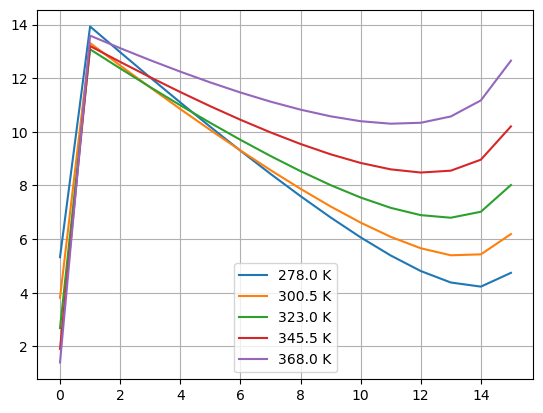

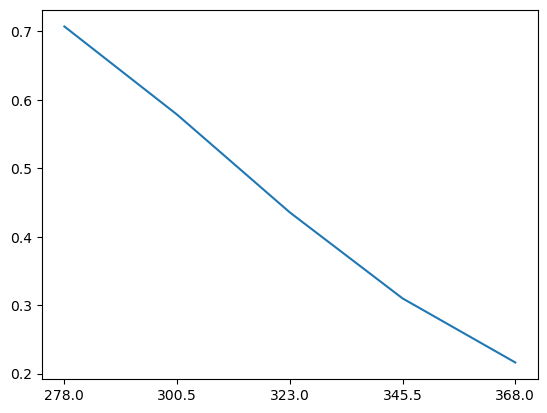

for test case
fh 0.5940074761028066


/var/folders/7l/2100442d14j36v6s7s59lflm0000gn/T/ipykernel_96588/2509827126.py:74: RuntimeWarning: divide by zero encountered in log
  fe = -R*temp*np.log(probs)


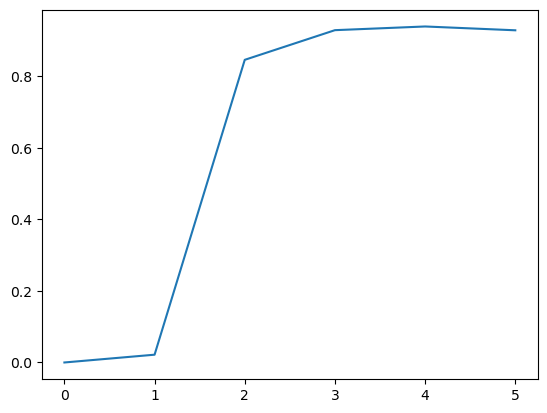

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import math

def get_s_temp(temp):
    s = s_ref * math.exp((t_ref-temp)/temp)
    return s

def get_all_sequences(nres):
    total_combs = 2**nres
    sequences = []
    for i in range(total_combs):
        bin_str = list(bin(i))[2:]
        seq = (nres-len(bin_str))*['0'] + bin_str
        
        seq = [int(i) for i in seq]
        sequences.append(seq)

    return sequences

def get_nu_nhelix(seq):
    num_nuc = 0
    if seq[0] == 1:
        num_nuc += 1
    for i in range(1, len(seq)):
        if seq[i] == 1 and seq[i-1] == 0:
            num_nuc += 1

    nhelix = sum(seq)
    return num_nuc, nhelix

def FE(nres, temp):
    z_tot = 0
    sequences = get_all_sequences(nres)

    s = get_s_temp(temp)

    sw_dict = {} 
    for seq in sequences:
        num_nuc, nhelix = get_nu_nhelix(seq)
        sw = math.pow(sigma, num_nuc) * math.pow(s, nhelix)
        # print(nhelix, num_nuc, sw, seq, math.pow(sigma, num_nuc), math.pow(s, nhelix), sep='\t')
        z_tot += sw
        if nhelix not in sw_dict.keys():
            sw_dict[nhelix] = sw
        else:
            sw_dict[nhelix] += sw

    probs = [sw_dict[i]/z_tot for i in range(nres+1)]
    # print('z_total', z_tot)
    fe = -R*temp*np.log(probs)
    # print(sw_dict, temp)
    fe = fe/1000
    return fe, probs

def FE_s_var(nres, temp):
    z_tot = 0
    sequences = get_all_sequences(nres)
    fh_arr = []
    for s in range(6):
        sw_dict = {} 
        for seq in sequences:
            num_nuc, nhelix = get_nu_nhelix(seq)
            sw = math.pow(sigma, num_nuc) * math.pow(s, nhelix)
            # print(nhelix, num_nuc, sw, seq, math.pow(sigma, num_nuc), math.pow(s, nhelix), sep='\t')
            z_tot += sw
            if nhelix not in sw_dict.keys():
                sw_dict[nhelix] = sw
            else:
                sw_dict[nhelix] += sw

        probs = [sw_dict[i]/z_tot for i in range(nres+1)]
        # print('z_total', z_tot)
        fe = -R*temp*np.log(probs)
        # print(sw_dict, temp)
        fe = fe/1000
        fh = fraction_helicity(nres, probs)
        fh_arr.append(fh)

    plt.plot(range(6), fh_arr)
    plt.show()

def fraction_helicity(nres, probs):
    fh = [i*probs[i] for i in range(len(probs))]
    return sum(fh)/nres

def plot_util(nres):
    temp = np.linspace(278, 368, 5)
    fh_arr = []
    for t in temp:
        fe, probs = FE(nres, t)
        fh_arr.append(fraction_helicity(nres, probs))
        plt.plot(fe, label=f"{t} K")
    
    
    plt.legend()
    plt.grid()
    plt.show()

    plt.plot(temp, fh_arr)
    plt.xticks(temp)
    plt.show()

# Use the existing variables
t_ref = 298
sigma = 0.001
R = 8.314
s_ref = 1.5
nres = 15

plot_util(nres)
print("for test case")
fe, probs = FE(nres, 298)
print('fh', fraction_helicity(nres, probs))
FE_s_var(nres, 298)


In [ ]:
# predict the number of microscopic routes in between the folded and unfolded states. 
from Levenshtein import distance 
nres = 5
ghc = -R*t_ref*

def generate_ssa_seqs(nres):
    seqs = []

    for start in range(nres):
        for end in range(nres):
            seq = [0]*nres
            if start <= end:
                seq[start:end+1] = [1]*(end-start+1)
            seq = ''.join([str(i) for i in seq])
            seqs.append(seq)

    return list(set(seqs))

def get_distance(seq1, seq2):
    dist = distance(seq1, seq2)

    return dist

def neighbours(seq, total_seqs):
    nlist = []
    for i in total_seqs:
        if get_distance(seq, i) == 1:
            nlist.append(i)
    
    return nlist

def generate_neighbour_list(total_seqs):
    neighbour_dict = {}
    for i in total_seqs:
        neighbour_dict[i] = neighbours(i, total_seqs)

    return neighbour_dict

def get_energy(state, t_ref = 298):
    state_seq = [int(i) for i in list(state)]
    nhelix = sum(state_seq)
    s = get_s_temp(t_ref)
    sw = sigma * math.pow(s, nhelix)
    
    

print("Generating sequences")
total_seqs = generate_ssa_seqs(nres)
# print(total_seqs)
print("Generating neighbour list")
neighbour_dict = generate_neighbour_list(total_seqs)
# display(neighbour_dict)

Generating sequences
['10000', '01000', '01111', '11100', '00100', '00110', '11111', '00111', '00011', '00000', '11000', '01110', '00010', '01100', '11110', '00001']
Generating neighbour list


{'10000': ['00000', '11000'],
 '01000': ['00000', '11000', '01100'],
 '01111': ['11111', '00111', '01110'],
 '11100': ['11000', '01100', '11110'],
 '00100': ['00110', '00000', '01100'],
 '00110': ['00100', '00111', '01110', '00010'],
 '11111': ['01111', '11110'],
 '00111': ['01111', '00110', '00011'],
 '00011': ['00111', '00010', '00001'],
 '00000': ['10000', '01000', '00100', '00010', '00001'],
 '11000': ['10000', '01000', '11100'],
 '01110': ['01111', '00110', '01100', '11110'],
 '00010': ['00110', '00011', '00000'],
 '01100': ['01000', '11100', '00100', '01110'],
 '11110': ['11100', '11111', '01110'],
 '00001': ['00011', '00000']}

In [ ]:
def simulate(start_state, neighbour_dict):
    current_state = start_state
    while True:
        print(current_state)
        if current_state == '0'*nres:
            break
        neighbours = neighbour_dict[current_state]
        chosen_neighbor = np.random.choice(neighbours)

        curr_energy = get_energy(current_state)